## Project Title: Predicting Heart Attack Probability Using Patient Data
## I. Data Exploration

### Step 1: Upload and Read CSV file containing Dataset from Kaggle

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

df_data_1 = pd.read_csv(body)
df_data_1.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#import pandas as pd

#dfPandas = pd.read_csv('HeartDataFile.csv')

dfPandas = df_data_1
dfPandas.head()
dfPandas.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Step 2: Checking for Missing Data in the Data Frame and then Provide a Head of this Missing Data. We will address this missing data a little later where we drop the columns that contain NaN

In [3]:
dfPandas.head()
dfPandas.shape

(303, 14)

In [4]:
dfPandas.dropna(axis=0, inplace=True)


In [5]:
dfPandas.shape
dfPandas.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
dfPandas.columns[0]

'age'

### Step 3: Perform Statistical Analysis on Data

In [7]:
LENGTH = len(dfPandas.columns)

In [8]:
from scipy.stats import *

for i in range(0,LENGTH-1):
    print('Statistics for Feature ',dfPandas.columns[i])
    stat = dfPandas.iloc[:,i].max()
    print('Max = ', stat)
    stat = dfPandas.iloc[:,i].min()
    print('Min = ', stat)
    stat = dfPandas.iloc[:,i].mean()
    print('Mean = ', stat)
    stat = dfPandas.iloc[:,i].skew()
    print('Skewness = ', stat)
    stat = dfPandas.iloc[:,i].kurtosis()
    print('Kurtosis = ', stat)
    print('------------------------------------------------------\n')

Statistics for Feature  age
Max =  77
Min =  29
Mean =  54.366336633663366
Skewness =  -0.2024633654856539
Kurtosis =  -0.5421671409908408
------------------------------------------------------

Statistics for Feature  sex
Max =  1
Min =  0
Mean =  0.6831683168316832
Skewness =  -0.791335191480832
Kurtosis =  -1.3829609835171006
------------------------------------------------------

Statistics for Feature  cp
Max =  3
Min =  0
Mean =  0.966996699669967
Skewness =  0.48473236883889675
Kurtosis =  -1.1930709803257231
------------------------------------------------------

Statistics for Feature  trestbps
Max =  200
Min =  94
Mean =  131.62376237623764
Skewness =  0.7137684379181465
Kurtosis =  0.9290540528369715
------------------------------------------------------

Statistics for Feature  chol
Max =  564
Min =  126
Mean =  246.26402640264027
Skewness =  1.1434008206693387
Kurtosis =  4.505423167753712
------------------------------------------------------

Statistics for Feature  fbs


In [9]:
print('Correlation Matrix Among Features Below')
dfPandas.iloc[0:LENGTH-1,0:LENGTH-1].corr()

Correlation Matrix Among Features Below


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,0.103961,-0.034375,0.304037,-0.010202,0.350810,-0.131555,-0.501478,0.217320,-0.185031,-0.047698,NaN,-0.465313
sex,0.103961,1.000000,0.172774,0.282889,-0.533999,0.284268,0.426006,0.360581,-0.433013,0.168266,-0.189094,NaN,0.000000
cp,-0.034375,0.172774,1.000000,0.397513,-0.292466,0.607785,-0.268124,-0.003545,-0.399004,0.456982,-0.418776,NaN,0.000000
trestbps,0.304037,0.282889,0.397513,1.000000,-0.569556,0.689674,-0.094577,-0.257128,-0.329304,0.102860,-0.106859,NaN,0.069544
chol,-0.010202,-0.533999,-0.292466,-0.569556,1.000000,-0.254547,0.004778,-0.133118,0.674681,-0.156661,0.027328,NaN,0.109094
fbs,0.350810,0.284268,0.607785,0.689674,-0.254547,1.000000,-0.272475,-0.255004,-0.123091,0.135196,-0.307860,NaN,0.000000
restecg,-0.131555,0.426006,-0.268124,-0.094577,0.004778,-0.272475,1.000000,0.230147,0.158114,-0.332092,0.395453,NaN,0.329140
thalach,-0.501478,0.360581,-0.003545,-0.257128,-0.133118,-0.255004,0.230147,1.000000,-0.018618,0.388037,0.063497,NaN,0.391085
exang,0.217320,-0.433013,-0.399004,-0.329304,0.674681,-0.123091,0.158114,-0.018618,1.000000,-0.158970,0.178647,NaN,0.000000
oldpeak,-0.185031,0.168266,0.456982,0.102860,-0.156661,0.135196,-0.332092,0.388037,-0.158970,1.000000,-0.744414,NaN,-0.330923


### Step 4: Scatter Plots Among Features to Illustrate Correlation If Any

In [10]:
from matplotlib import pyplot as plt

In [11]:
##Obtain a Sample of the Data Only for Plotting with n = 100 (max)

dfPandasSample = dfPandas.sample(n=100,random_state=1)

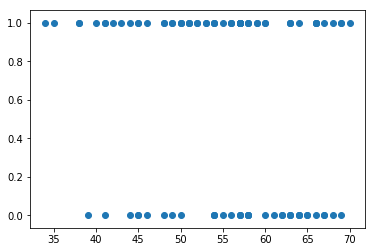

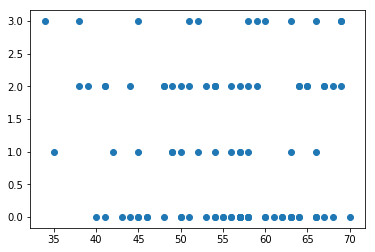

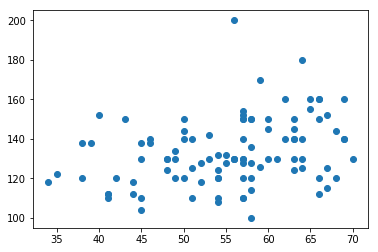

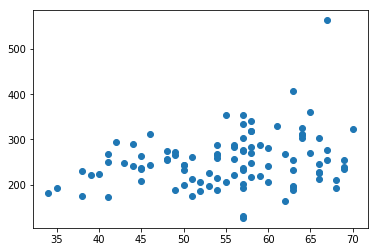

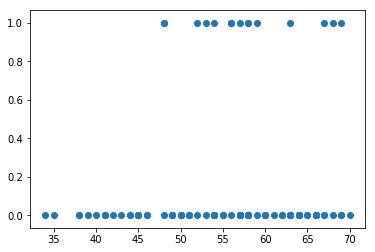

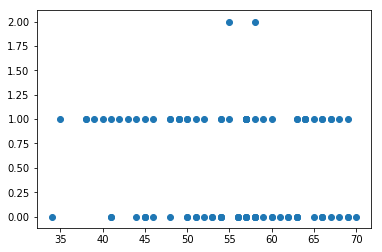

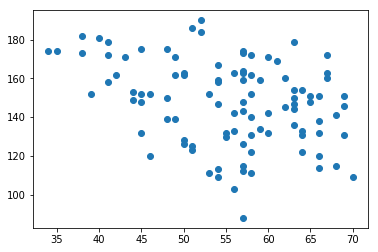

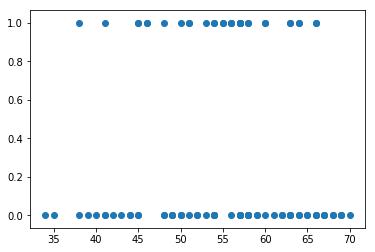

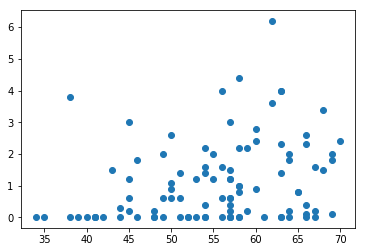

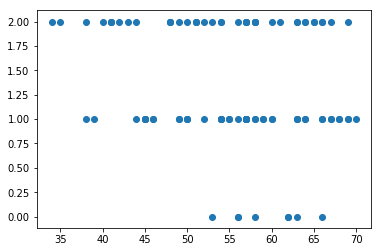

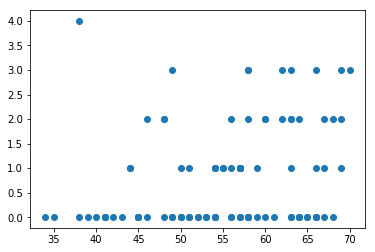

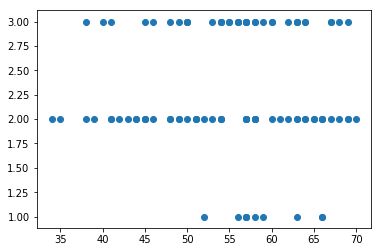

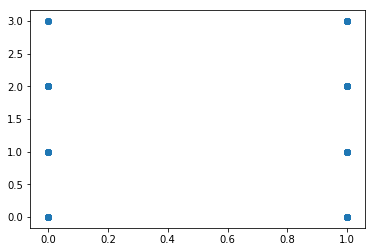

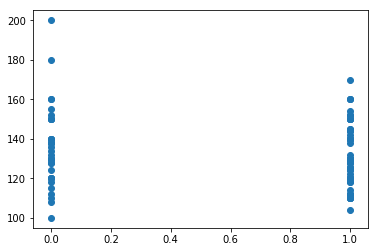

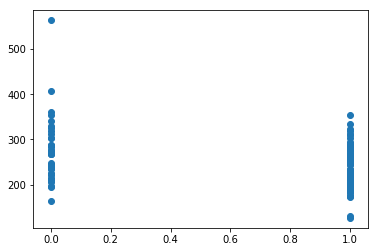

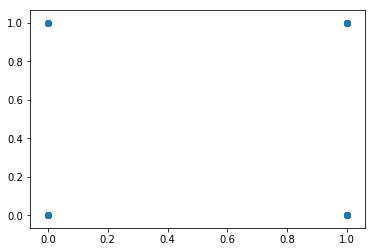

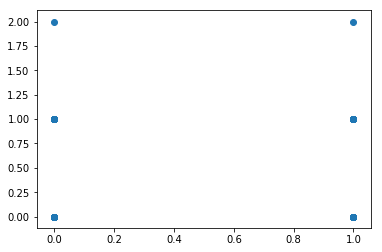

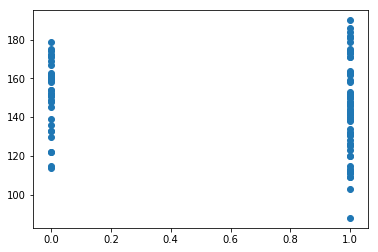

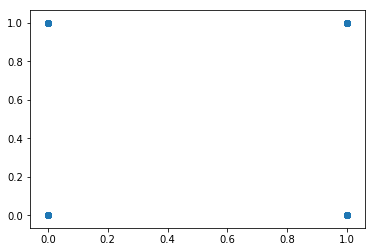

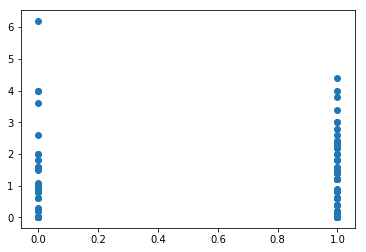

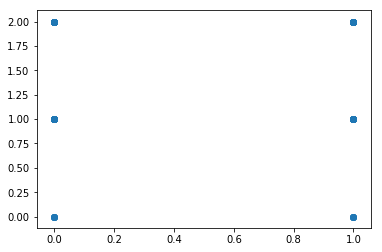

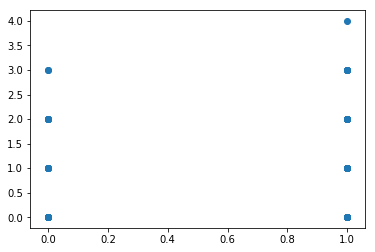

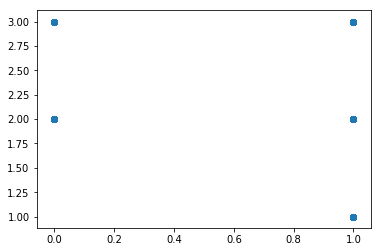

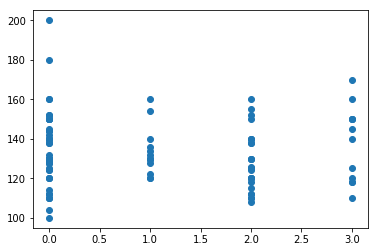

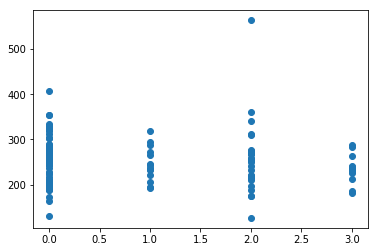

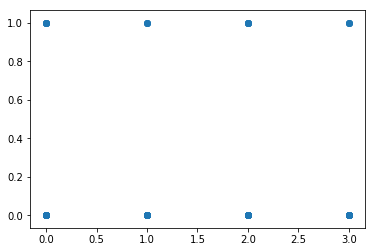

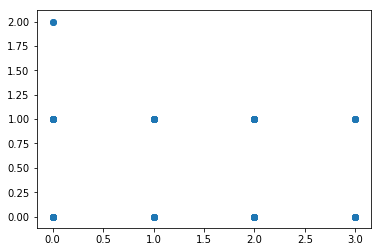

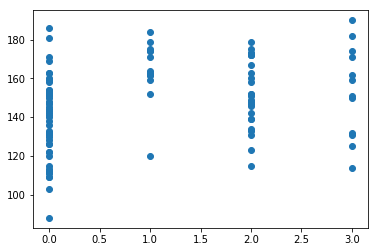

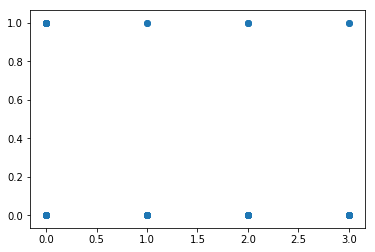

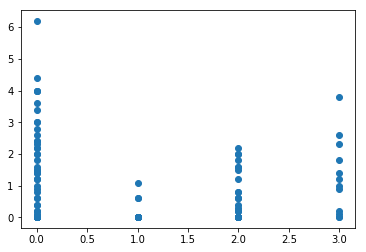

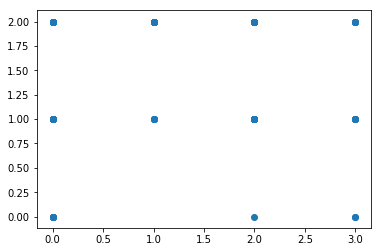

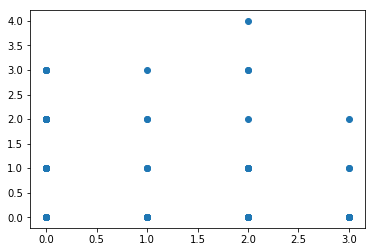

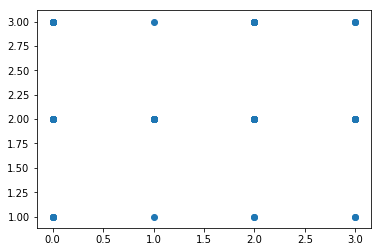

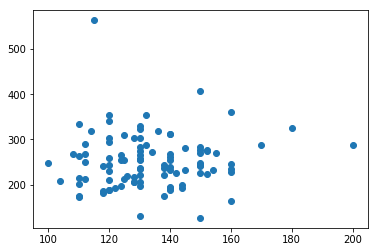

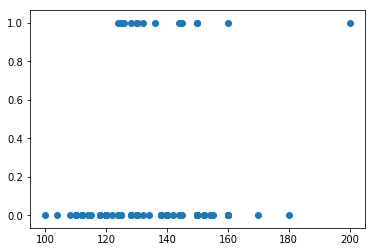

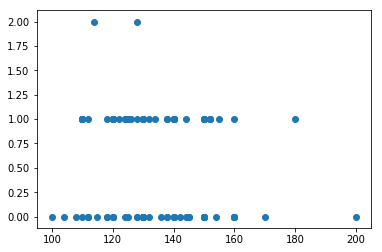

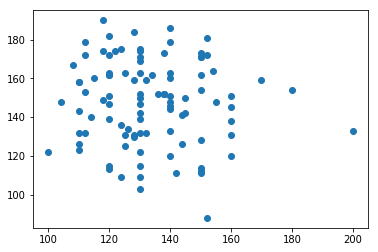

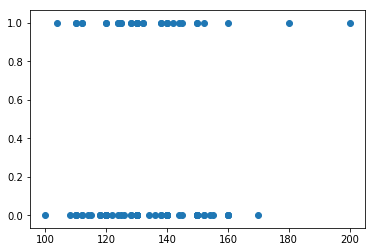

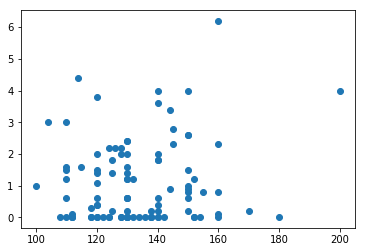

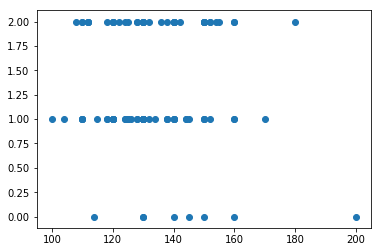

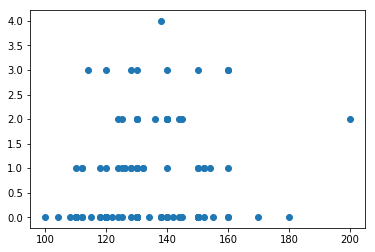

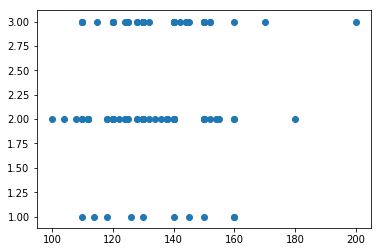

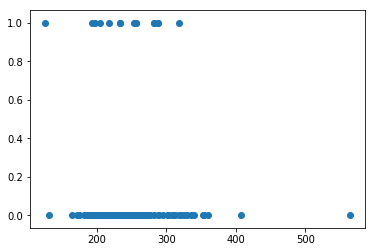

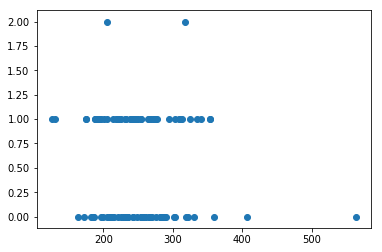

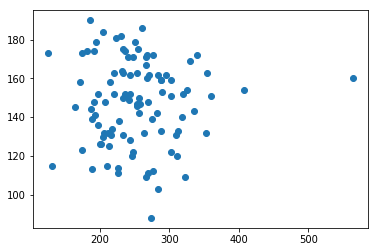

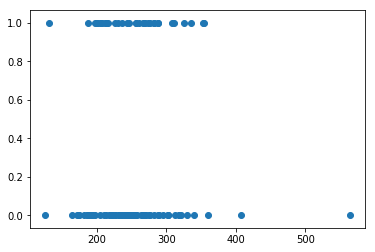

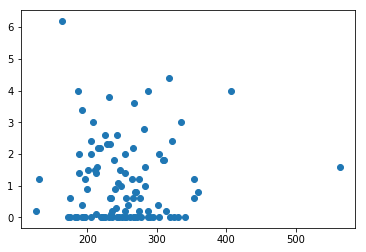

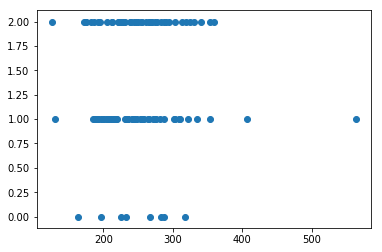

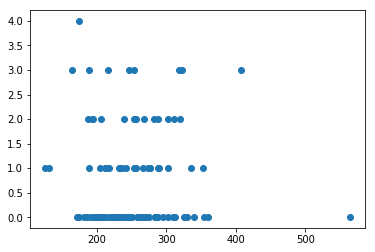

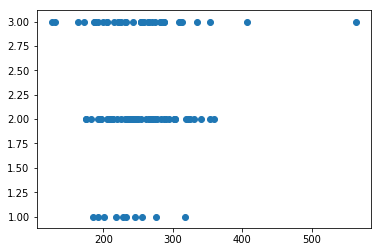

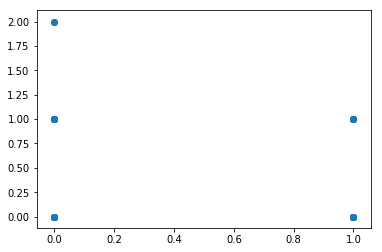

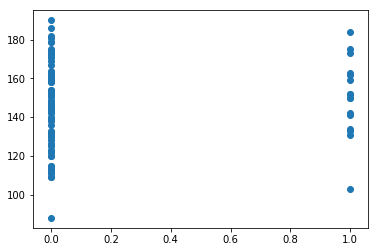

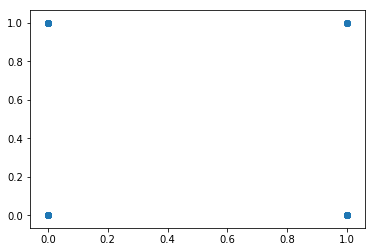

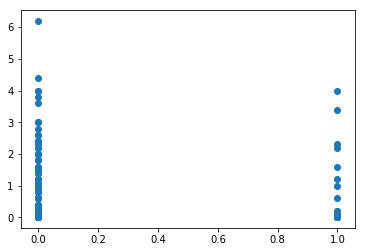

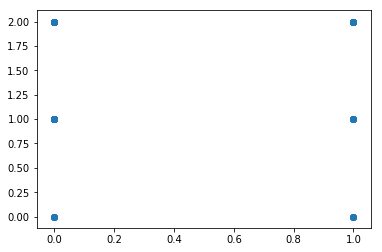

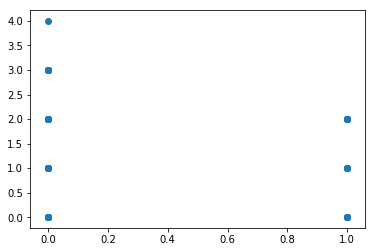

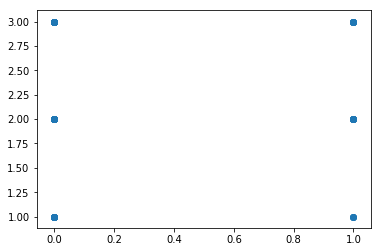

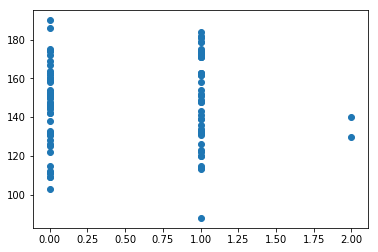

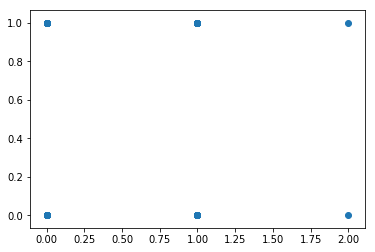

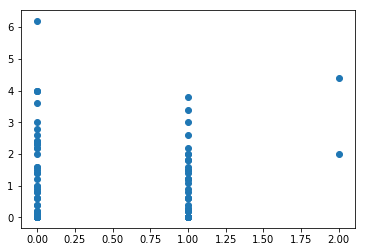

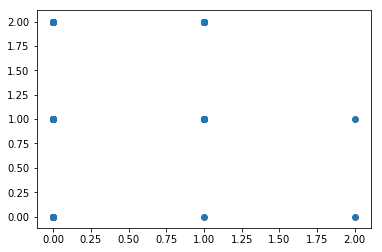

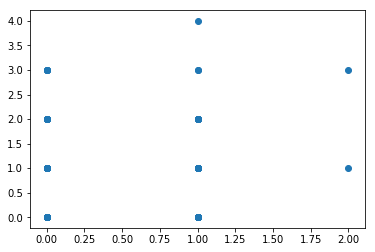

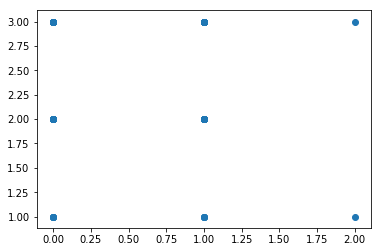

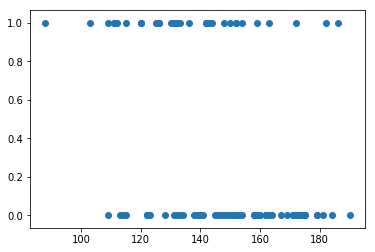

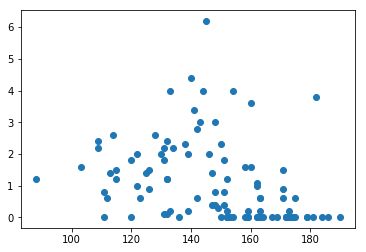

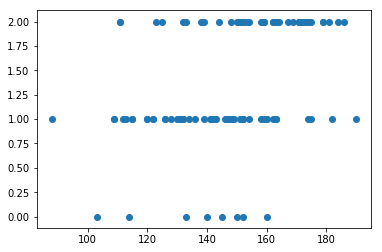

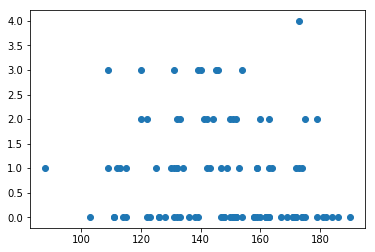

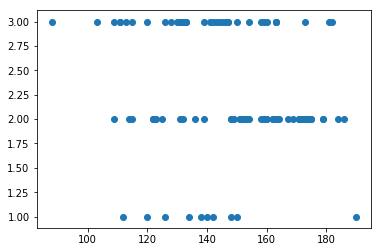

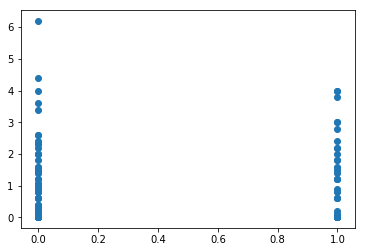

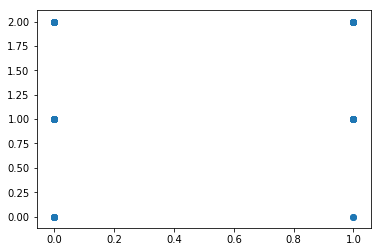

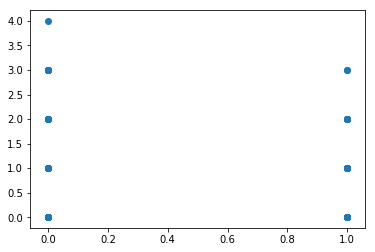

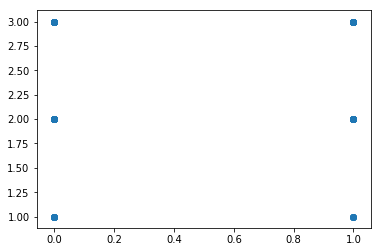

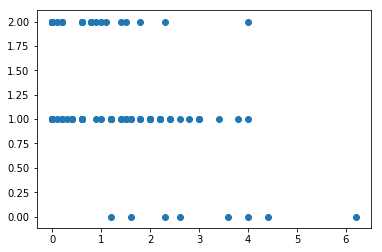

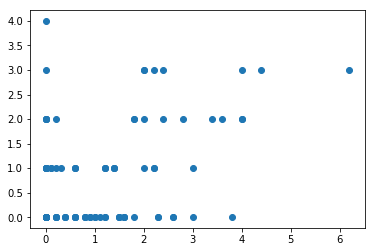

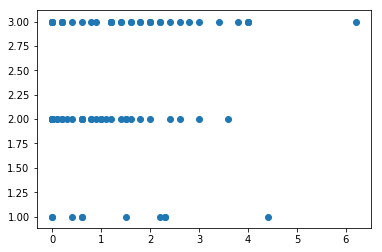

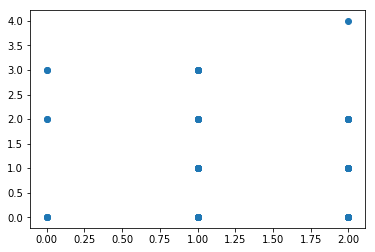

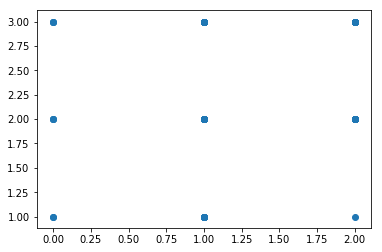

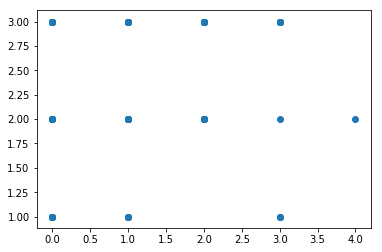

In [12]:
for i in range(0,LENGTH-1):
    for j in range(i+1,LENGTH-1):
        xarray = dfPandasSample.iloc[:,i]
        yarray = dfPandasSample.iloc[:,j]
        plt.scatter(xarray,yarray)
        plt.show()

### REPORT ON DATA EXPLORATION

### 1. The missing data (if any) has been removed.
### 2. The statistics do not show any evidence of extrordinary skewness of kurtosis (outliers).
### 3. The correlation matrix does not show any of the features highly correlated pairwise. Hence,
###      the features are good for modeling.
### 4. The scatter plot among the features do not show any significant correlation. Hence it
###      confirms 3 above.